In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandasql as pql
from datetime import datetime

from scipy.stats.stats import pearsonr

%matplotlib inline

In [19]:

base_dir = "G:/project/dataset/didi/season_1/training_data"

train_cluster_map_file = os.path.join(base_dir, 'cluster_map', 'cluster_map')
train_poi_file = os.path.join(base_dir, 'poi_data', 'poi_data')

train_sd_gap_file = os.path.join(base_dir, 'sd_gap.csv')


train_order_file = os.path.join(base_dir, 'order_data', 'order_data.csv')

train_traffic_file = os.path.join(base_dir, 'traffic_data', 'traffic-data.csv')

all_traffic_file = os.path.join(base_dir, 'traffic_data', 'all_traffic.csv')

small_traffic_file = os.path.join(base_dir, "traffic.csv")

# test data directory
test_base_dir = "G:/project/dataset/didi/season_1/test_set_1"
test_traffic_file = os.path.join(base_dir, 'traffic_data', 'traffic-data.csv')

sd_gap_file = os.path.join(test_base_dir, '..', 'gap.csv')

full_index_file = os.path.join(base_dir, '..', 'fullindex.csv')
test_submit_file = os.path.join(test_base_dir, 'test.txt')
submit_file = os.path.join(test_base_dir, 'submit.csv')
result_file = os.path.join(test_base_dir, 'result.csv')

# 供需数据分析 

## 读取预处理的供需数据


In [3]:
all_sd_df = pd.read_csv(sd_gap_file, dtype = {'id': np.int16, 'TimePiece': np.int16, 'demand': np.int32, 
                                                'supply': np.int32, 'gap': np.int32, 'week': np.int8})

In [4]:
all_sd_df.describe()

,id,TimePiece,demand,supply,gap,week
count,171415.000000,171415.000000,171415.000000,171415.000000,171415.000000,171415.000000
mean,31.777184,79.005035,53.079363,43.596908,9.482455,3.046933
std,18.571293,39.159688,113.876910,82.040953,50.229963,1.994379
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,16.000000,50.000000,4.000000,3.000000,0.000000,1.000000
50%,31.000000,81.000000,12.000000,10.000000,1.000000,3.000000
75%,47.000000,112.000000,48.000000,42.000000,4.000000,5.000000
max,66.000000,144.000000,4362.000000,1084.000000,3872.000000,6.000000


In [4]:
train_df = all_sd_df[(all_sd_df.Date > '2016-01-03') & (all_sd_df.Date < '2016-01-22')]
test_df = all_sd_df[all_sd_df.Date > '2016-01-21']

## 基于星期的工作日区分

In [5]:
all_sd_df['work'] = pd.Series([e < 5 for e in all_sd_df.week])

In [5]:
all_sd_df.describe()

,id,TimePiece,demand,supply,gap,week,work
count,171415.000000,171415.000000,171415.000000,171415.000000,171415.000000,171415.000000,171415
mean,31.777184,79.005035,53.079363,43.596908,9.482455,3.046933,0.707674
std,18.571293,39.159688,113.876910,82.040953,50.229963,1.994379,0.454832
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,False
25%,16.000000,50.000000,4.000000,3.000000,0.000000,1.000000,0
50%,31.000000,81.000000,12.000000,10.000000,1.000000,3.000000,1
75%,47.000000,112.000000,48.000000,42.000000,4.000000,5.000000,1
max,66.000000,144.000000,4362.000000,1084.000000,3872.000000,6.000000,True


# 目前只使用 4号到21号的数据

1. 元旦假期数据特殊 
2. 22号后是测试里的训练数据， 提供的时间片、 地区非常少

In [29]:
full_df = pd.read_csv(full_index_file, dtype = {'id': np.int16, 'TimePiece': np.int16})
print len(full_df)
full_data = full_df.merge(all_sd_df, on=['id', 'Date', 'TimePiece'], how='left')
full_data[:3]
full_data.demand = full_data.demand.interpolate()
full_data.supply = full_data.supply.interpolate()

247104


In [30]:
data = full_data[(full_data.Date > '2016-01-03') & (full_data.Date < '2016-01-22')]

In [31]:
cluster_data = []

In [35]:

for region, rgr in data.groupby('id'): 
    x =  rgr.groupby('TimePiece').demand.mean().values
    #print x.size
    
    cluster_data.append(x)
    
len(cluster_data)
cluster_data = np.array(cluster_data)
    

In [36]:
from sklearn.cluster import KMeans

In [ ]:
kmeans = KMeans(init='k-means++', n_clusters=n_digits, n_init=10)
kmeans.fit(reduced_data)

# 区域之间的相关（相似）度

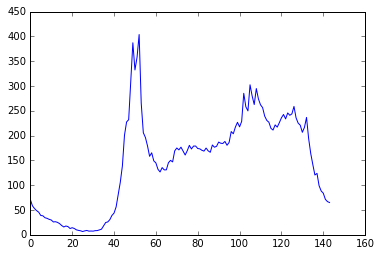

In [39]:
plt.plot(cluster_data[0])

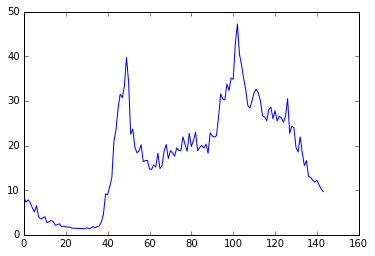

In [43]:
plt.plot(cluster_data[1])

In [42]:
cor_matrix = []
from scipy.stats.stats import pearsonr
for i in range(len(cluster_data)):
    a = []
    for j in range(0, i):
        coef = pearsonr(cluster_data[i], cluster_data[j])
        if i <= 5 and j <= 5:
            #plt.figure()
            #plt.title(str(coef))
            #plt.plot(cluster_data[i])
            #plt.plot(cluster_data[j])
            print cluster_data[i]
            print cluster_data[j]

[  8.27777778   7.33333333   7.83333333   7.16666667   6.05555556
   5.11111111   6.5          4.           3.55555556   3.75         4.05555556
   2.69444444   2.97222222   3.22222222   2.94444444   2.13888889
   2.30555556   2.45833333   1.78055556   1.9404321    1.79475309
   1.72777778   1.69320988   1.49012346   1.47407407   1.43818342
   1.43470018   1.41269841   1.39007937   1.33134921   1.57910053
   1.38240741   1.48333333   1.85555556   1.55555556   1.83703704
   1.95185185   2.9          4.67222222   9.16666667   9.          10.77777778
  12.77777778  20.94444444  23.55555556  28.38888889  31.5         30.72222222
  33.33333333  39.72222222  34.27777778  22.55555556  23.66666667
  19.66666667  18.33333333  18.83333333  20.16666667  16.38888889
  16.61111111  16.66666667  14.72222222  14.66666667  15.66666667
  15.16666667  18.27777778  14.83333333  15.5         18.77777778
  20.22222222  17.05555556  18.83333333  18.38888889  17.61111111
  19.44444444  18.88888889  18.833333

# 交通情况分析

## 从交通情况中间文件读取

区域 日期 时间片 交通情况

In [12]:
traffic_file = os.path.join(base_dir, "traffic.csv")

all_traffic = pd.read_csv(traffic_file, dtype={'TimePiece': np.int16})
all_traffic['week'] = pd.Series([datetime.strptime(e, "%Y-%m-%d").weekday() for e in all_traffic.Date])
all_traffic[:4]

,hashid,Date,TimePiece,traffic,week
0,08232402614a9b48895cc3d0aeb0e9f2,2016-01-01,2,0.075000,4
1,08232402614a9b48895cc3d0aeb0e9f2,2016-01-01,3,0.127854,4
2,08232402614a9b48895cc3d0aeb0e9f2,2016-01-01,4,0.161994,4
3,08232402614a9b48895cc3d0aeb0e9f2,2016-01-01,5,0.117460,4


In [13]:
all_traffic.describe()

,TimePiece,traffic,week
count,201934.000000,201934.000000,201934.000000
mean,73.537913,0.094944,3.039206
std,41.009222,0.043510,2.000580
min,2.000000,0.000000,0.000000
25%,39.000000,0.066667,1.000000
50%,74.000000,0.093333,3.000000
75%,109.000000,0.122040,5.000000
max,144.000000,1.000000,6.000000


## 训练集的交通情况

In [17]:
train_traffic = all_traffic[(all_traffic.Date < '2016-01-22') & (all_traffic.Date > '2016-01-03') ]

# 可视化

## 按星期看平均交通

# 本来想看看区域之间的相关（相似）度

还没求出来

In [ ]:
cor_data = all_sd_df[(all_sd_df.Date > '2016-01-02') & (all_sd_df.Date < '2016-01-22')]
group_cor = cor_data.groupby('id')

In [ ]:
corr_matrix = []
for r, grp in group_cor:
    corr_row = []
    rserial = grp.groupby(['Date', 'TimePiece']).demand.mean().values
    #print type(rserial.values)
    #break
    for c, cgrp in group_cor:
        if r < c:
            continue
        cserial = cgrp.groupby(['Date', 'TimePiece']).demand.mean().values
        corr_row.append(pearsonr(rserial, cserial))
    corr_matrix.append(corr_row)